In [2]:
import pandas as pd
from pmdarima.arima import ADFTest

In [3]:
# 필요한 라이브러리를 읽어 온다.
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm                        # Progress 바 출력.
import matplotlib.pyplot as plt
import rpy2.robjects as robjects            # R 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects.packages import importr  # rpy2 내의 패키지를 불러오는 importr 클래스.
from rpy2.robjects import pandas2ri         # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
from statsmodels.tsa.seasonal import seasonal_decompose     # 지수평활화 모형.

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [5]:
df = pd.read_csv('no_outlier_data.csv')

In [6]:
# 공급사 A를 일 단위로 예측하자

In [7]:
df_A = df[df['supplys'] =='A']
df_A = df_A.reset_index(drop=True)
df_A

,supplys,year,month,day,weekday,hour,datetime,avg_temp,mini_temp,max_temp,target
0,A,2013,1,1,1,1,2013-01-01,-3.2,-9.1,2.6,2497.129
1,A,2013,1,1,1,2,2013-01-01,-3.2,-9.1,2.6,2363.265
2,A,2013,1,1,1,3,2013-01-01,-3.2,-9.1,2.6,2258.505
3,A,2013,1,1,1,4,2013-01-01,-3.2,-9.1,2.6,2243.969
4,A,2013,1,1,1,5,2013-01-01,-3.2,-9.1,2.6,2344.105
...,...,...,...,...,...,...,...,...,...,...,...
52555,A,2018,12,31,0,20,2018-12-31,-3.2,-9.9,4.0,3040.868
52556,A,2018,12,31,0,21,2018-12-31,-3.2,-9.9,4.0,2973.577
52557,A,2018,12,31,0,22,2018-12-31,-3.2,-9.9,4.0,2840.272
52558,A,2018,12,31,0,23,2018-12-31,-3.2,-9.9,4.0,2692.385


In [8]:
grouped = df_A.groupby(['year','month','day']).mean().reset_index()
grouped

,year,month,day,weekday,hour,avg_temp,mini_temp,max_temp,target
0,2013,1,1,1.0,12.5,-3.2,-9.1,2.6,2505.222333
1,2013,1,2,2.0,12.5,-6.0,-11.2,0.0,3093.180333
2,2013,1,3,3.0,12.5,-9.9,-13.9,-5.1,3303.600000
3,2013,1,4,4.0,12.5,-9.0,-14.7,-1.9,3274.730333
4,2013,1,5,5.0,12.5,-5.9,-13.1,1.0,2902.389000
...,...,...,...,...,...,...,...,...,...
2185,2018,12,27,3.0,12.5,-4.8,-8.1,-0.5,2793.163208
2186,2018,12,28,4.0,12.5,-7.0,-10.7,-2.7,3013.883917
2187,2018,12,29,5.0,12.5,-5.1,-9.5,-0.7,2695.486125
2188,2018,12,30,6.0,12.5,-4.7,-9.4,0.9,2594.260750


<AxesSubplot:>

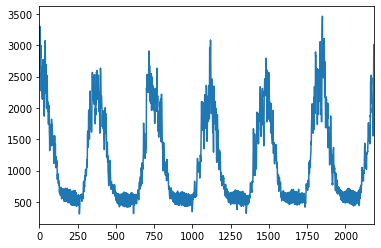

In [9]:
grouped['target'].plot()

In [10]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
year         2190 non-null int64
month        2190 non-null int64
day          2190 non-null int64
weekday      2190 non-null float64
hour         2190 non-null float64
avg_temp     2190 non-null float64
mini_temp    2190 non-null float64
max_temp     2190 non-null float64
target       2190 non-null float64
dtypes: float64(6), int64(3)
memory usage: 154.1 KB


In [11]:
grouped['datetime'] = grouped['year'].astype(str) + '-' + grouped['month'].astype(str) + '-' + grouped['day'].astype(str)
grouped['datetime'] = pd.to_datetime(grouped['datetime'], infer_datetime_format=True)
grouped = grouped[['datetime','target']]

In [12]:
grouped = grouped.set_index('datetime')

In [13]:
grouped

,target
datetime,
2013-01-01,2505.222333
2013-01-02,3093.180333
2013-01-03,3303.600000
2013-01-04,3274.730333
2013-01-05,2902.389000
...,...
2018-12-27,2793.163208
2018-12-28,3013.883917
2018-12-29,2695.486125


In [14]:
grouped_train_df = grouped[1500:1825]
grouped_test_df = grouped[1825:1914]
grouped_test_df

,target
datetime,
2018-01-01,1949.764542
2018-01-02,2310.310125
2018-01-03,2422.894292
2018-01-04,2484.586667
2018-01-05,2373.224417
...,...
2018-03-26,1254.946083
2018-03-27,1118.737333
2018-03-28,1039.080750


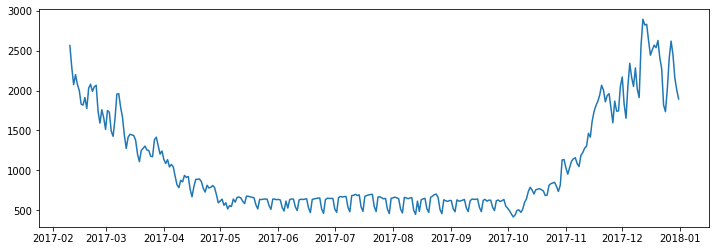

In [15]:
plt.figure(figsize =(12,4))
plt.plot(grouped_train_df)

C:\Users\zlfck\anaconda3\envs\store_amount_prediction\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

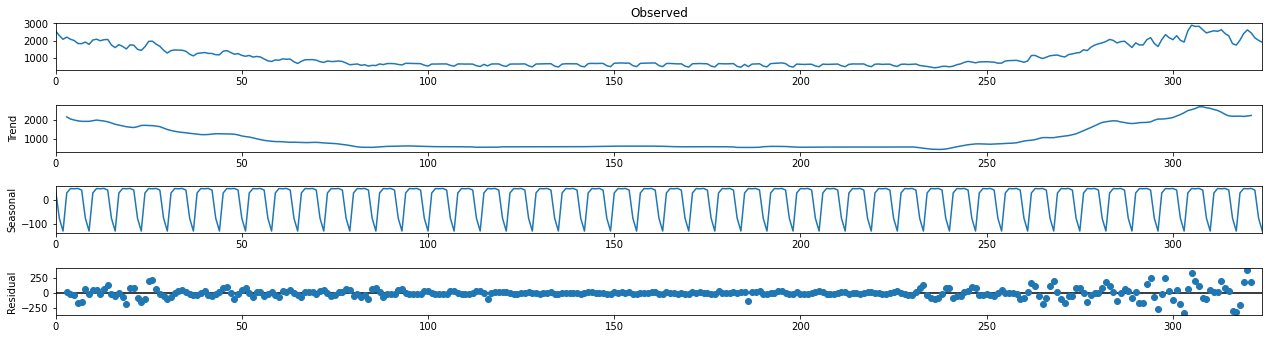

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(grouped_train_df.target.values, model = 'additive', freq = 7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(grouped_train_df.target.values)
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("\t%s : %.3f" % (key, value))

ADF Statistic : -1.203982
p-value : 0.671880
Critical Values:
	1% : -3.452
	5% : -2.871
	10% : -2.572


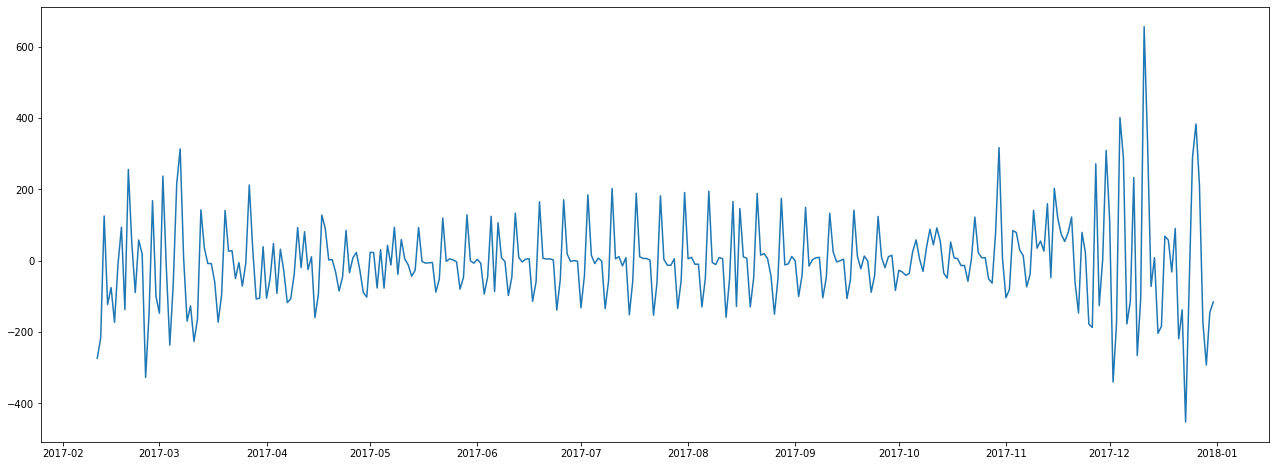

In [18]:
target_diff = grouped_train_df['target'] - grouped_train_df['target'].shift()
plt.figure(figsize = (22,8))
plt.plot(target_diff)
plt.show()

In [19]:
target_diff

datetime
2017-02-10           NaN
2017-02-11   -273.433000
2017-02-12   -216.659000
2017-02-13    125.181333
2017-02-14   -122.800667
                 ...    
2017-12-27    213.296250
2017-12-28   -172.546875
2017-12-29   -292.543583
2017-12-30   -145.080792
2017-12-31   -115.842042
Name: target, Length: 325, dtype: float64

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(target_diff[1:])
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("\t%s : %.3f" % (key, value))

ADF Statistic : -3.328797
p-value : 0.013639
Critical Values:
	1% : -3.452
	5% : -2.871
	10% : -2.572


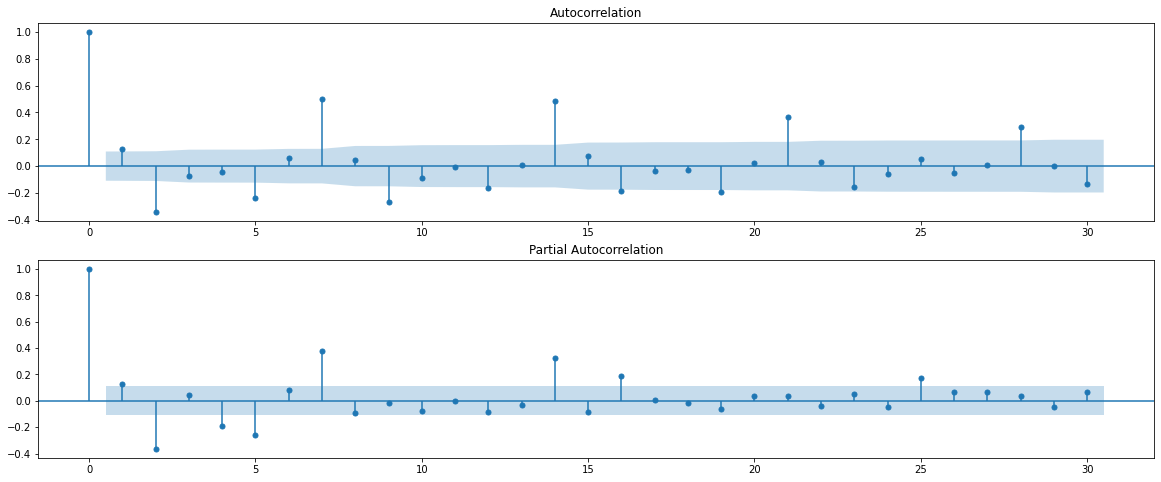

In [21]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(target_diff[1:], lags = 30, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(target_diff[1:], lags = 30, ax = ax2)

In [22]:
grouped_train_df

,target
datetime,
2017-02-10,2564.365667
2017-02-11,2290.932667
2017-02-12,2074.273667
2017-02-13,2199.455000
2017-02-14,2076.654333
...,...
2017-12-27,2620.554458
2017-12-28,2448.007583
2017-12-29,2155.464000


In [23]:
grouped_test_df

,target
datetime,
2018-01-01,1949.764542
2018-01-02,2310.310125
2018-01-03,2422.894292
2018-01-04,2484.586667
2018-01-05,2373.224417
...,...
2018-03-26,1254.946083
2018-03-27,1118.737333
2018-03-28,1039.080750


In [24]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime


model = ARIMA(grouped_train_df.target.values, order = (1,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  324
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1981.909
Method:                       css-mle   S.D. of innovations            109.666
Date:                Mon, 08 Nov 2021   AIC                           3973.818
Time:                        10:43:30   BIC                           3992.722
Sample:                             1   HQIC                          3981.364
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9424      3.935     -0.240      0.811      -8.654       6.769
ar.L1.D.y      0.2350      0.113      2.079      0.038       0.013       0.457
ma.L1.D.y     -0.0753      0.101     -0.746      0.4

<AxesSubplot:title={'center':'실제값과 예측값의 잔차'}>

C:\Users\zlfck\anaconda3\envs\store_amount_prediction\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zlfck\anaconda3\envs\store_amount_prediction\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zlfck\anaconda3\envs\store_amount_prediction\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zlfck\anaconda3\envs\store_amount_prediction\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zlfck\anaconda3\envs\store_amount_prediction\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

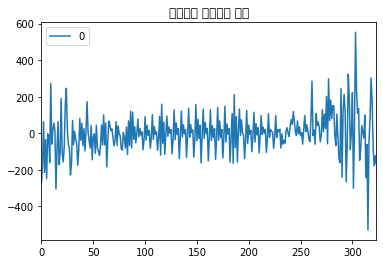

In [25]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [26]:
forecast_data = model_fit.forecast(steps=100)
pred_arima_y = forecast_data[0].tolist()

In [29]:
forecast_data

(array([1932.40935416, 2013.42094941, 2031.73795938, 2035.32157964,
        2035.44281522, 2034.75038143, 2033.86673324, 2032.93814917,
        2031.99900505, 2031.0573793 , 2030.11517035, 2029.17282435,
        2028.23044614, 2027.28806037, 2026.34567281, 2025.40328484,
        2024.46089677, 2023.51850868, 2022.57612058, 2021.63373248,
        2020.69134438, 2019.74895628, 2018.80656818, 2017.86418008,
        2016.92179198, 2015.97940388, 2015.03701577, 2014.09462767,
        2013.15223957, 2012.20985147, 2011.26746337, 2010.32507527,
        2009.38268717, 2008.44029907, 2007.49791097, 2006.55552287,
        2005.61313477, 2004.67074667, 2003.72835857, 2002.78597047,
        2001.84358237, 2000.90119427, 1999.95880617, 1999.01641806,
        1998.07402996, 1997.13164186, 1996.18925376, 1995.24686566,
        1994.30447756, 1993.36208946, 1992.41970136, 1991.47731326,
        1990.53492516, 1989.59253706, 1988.65014896, 1987.70776086,
        1986.76537276, 1985.82298466, 1984.88059

In [30]:
test_y = grouped_test_df.target.values

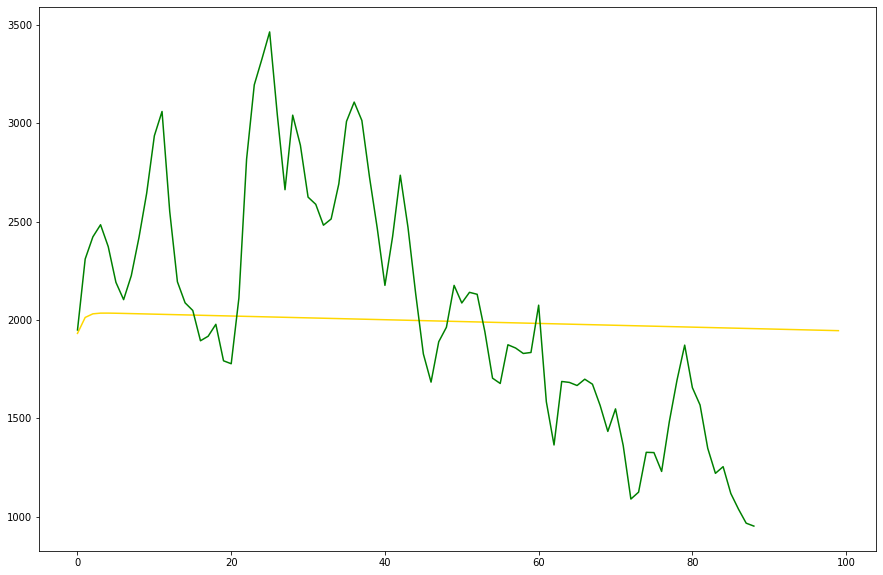

In [31]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')
# 실제 가격 그래프
plt.plot(test_y, color = 'green')
